In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
hdtrain = pd.read_csv("./data/train.csv")
hdtest = pd.read_csv("./data/test.csv")

Pre processing part:
======================
we want to get more precise report from the relation between variables and SalePrice


In [4]:
pd.set_option('max_columns',1000)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
hdtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

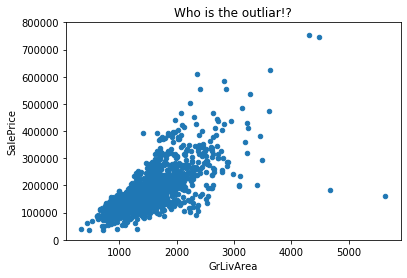

In [46]:
xvar = 'GrLivArea'
yvar = 'SalePrice'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000), title="Who is the outliar!?")

It seems that there are linear relationship between them? huhn?

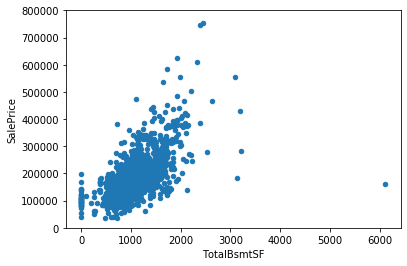

In [12]:
xvar = 'TotalBsmtSF'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000))

This is not really like a linear function... it is an (Strong linear) exponential relationship????

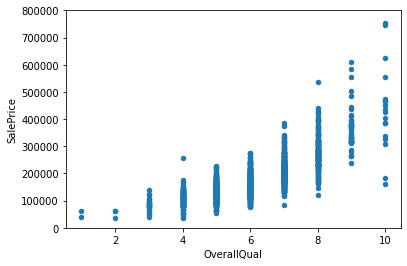

In [47]:
xvar = 'OverallQual'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000))

Ranks that given by some people maybe high above their average scores but lower than any other peoples, this factor should be considered, but we didn't have enough data to solve this.....

It is easy to think that the price of a building is deep related to the year that it established.

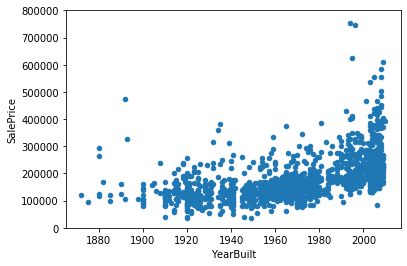

In [48]:
xvar = 'YearBuilt'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

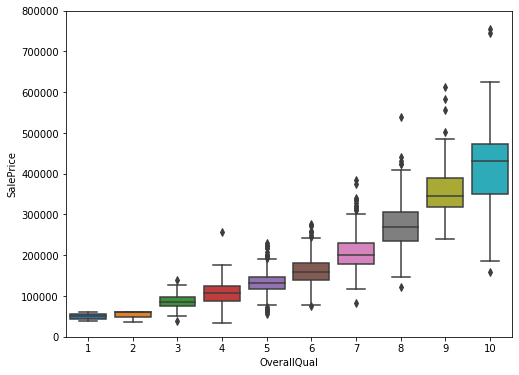

In [13]:
xvar="OverallQual"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

The price is positive related to the overall material

(-0.5, 8.5, 0, 800000)

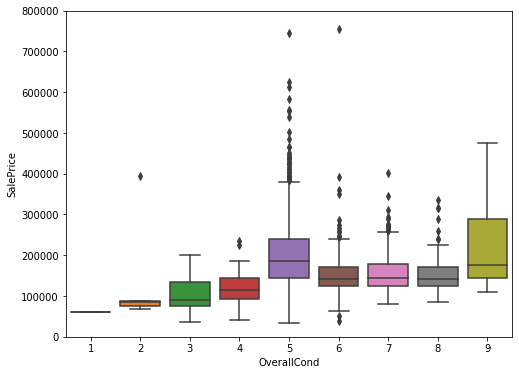

In [14]:
xvar="OverallCond"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

but is very weak positive relative to the overall condition rate

In [15]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    hdtrain[col].fillna("None", inplace=True)

A simple method to deal with discrete values: delete them

(-0.5, 3.5, 0, 800000)

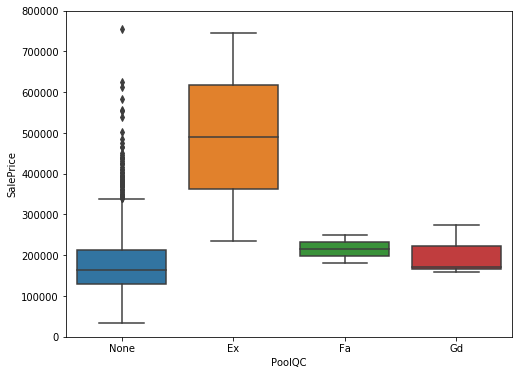

In [16]:
xvar="PoolQC"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

House's price will become very high if it have a excellent swimming pool

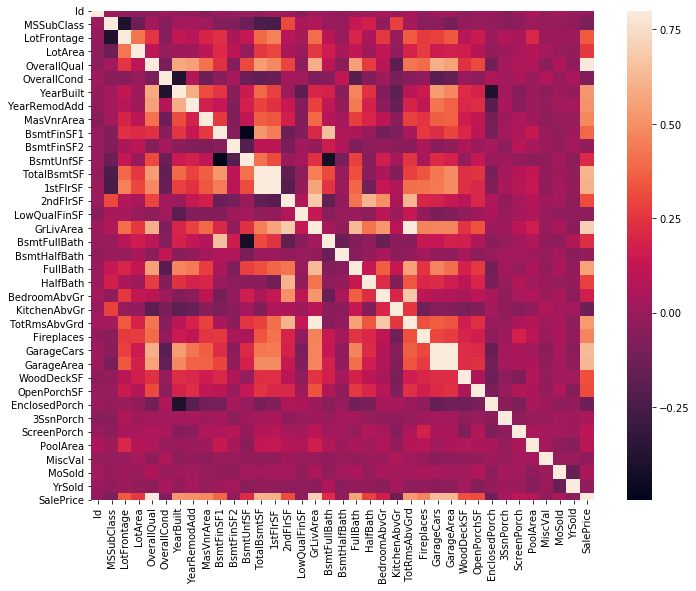

In [17]:
corrmatrix = hdtrain.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix,vmax=.8,square=True)

The heatmap proved that the overallcond didn't closely linked with SalePrice that we observed above. We noticed that LotFrontage OverallQual, YearBuilt, YearRemodAdd,MasVnrArea,BsmtfinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,FirePlaces is very heat with SalePrice.

<class 'pandas.core.indexes.base.Index'>


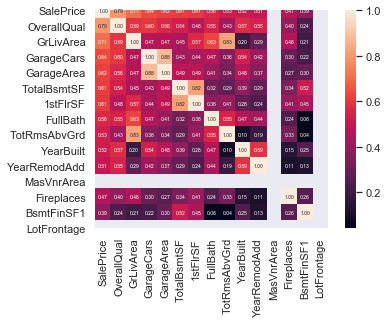

In [18]:
k=15
columns = corrmatrix.nlargest(k,yvar)[yvar].index
print(type(columns))
cocm = np.corrcoef(hdtrain[columns].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cocm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(hdtrain[columns], height = 2.5)
plt.show()

In [ ]:
columns = ['SalePrice','FullBath', 'YearBuilt','GarageArea','1stFlrSF','YearRemodAdd']
sns.pairplot(hdtrain[columns], height=2.5)
plt.show()

In [21]:
print(hdtrain.columns)
print(len(hdtrain.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

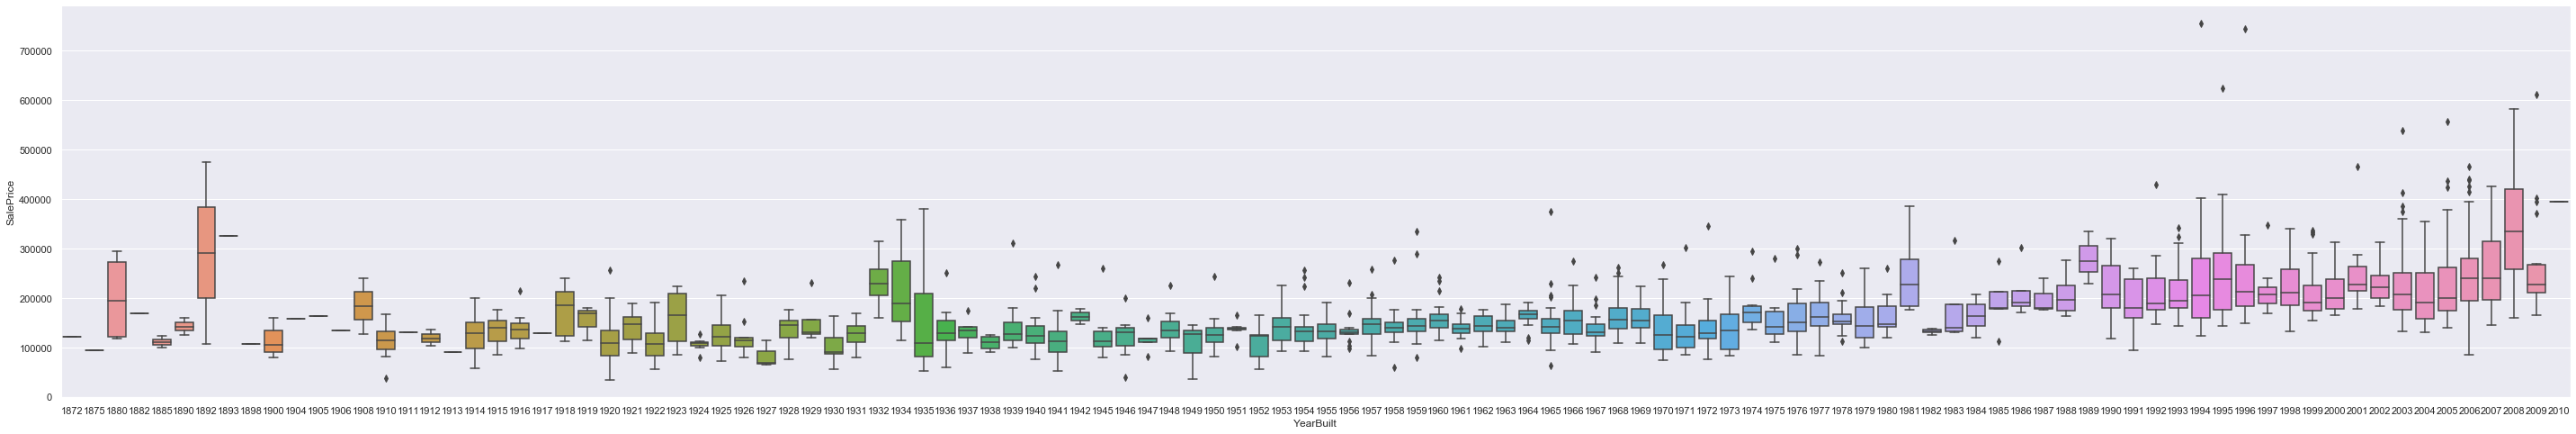

In [24]:
plt.figure(figsize=(50,8))
sns.boxplot(hdtrain.YearBuilt,hdtrain.SalePrice)

In [25]:
print(type(hdtrain.YearBuilt[1]))

<class 'numpy.int64'>


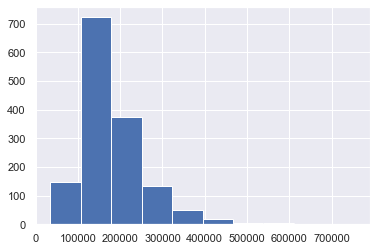

In [26]:
sp_list = hdtrain.SalePrice
sp_list.hist()

In [27]:
print(hdtrain['SalePrice'].describe())

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64


In [28]:
print("Skewness: %f" % hdtrain['SalePrice'].skew())
print("Kurtosis: %f" % hdtrain['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


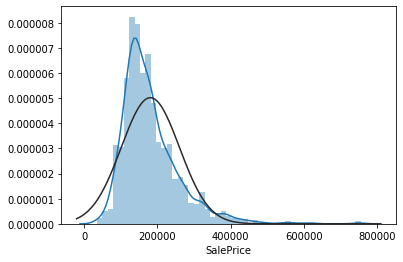

In [6]:
from scipy.stats import norm
sns.distplot(hdtrain['SalePrice'],fit=norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

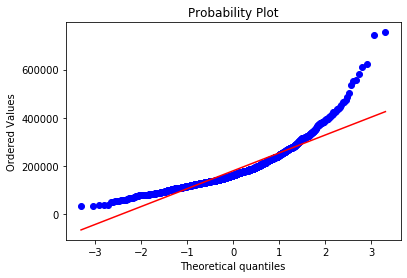

In [8]:
fig = plt.figure()
stats.probplot(hdtrain['SalePrice'], plot=plt)

A branch for logarithm funcition normalization
-----------------------------------------------

In [ ]:
hdtrain['SalePrice']=np.log[hdtrain["SalePrice"]]

Main branch continued-->

In [5]:
hdtrain=hdtrain.drop(hdtrain.loc[hdtrain['Electrical'].isnull()].index)

Simply drop the null values in above

In [32]:
saleprice_scaled = StandardScaler().fit_transform(hdtrain['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('low of the distribution:')
print(low_range)
print('\nhigh of the distribution:')
print(high_range)

low of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

high of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Start deal with outliars.(Like above)
--------------------------------------

In [6]:
hdtrain.drop(hdtrain[(hdtrain['GrLivArea']>4000)&(hdtrain['SalePrice']<210000)].index,inplace=True)
#hdtrain.drop(hdtrain[[(hdtrain['OverallQual']<5)&(hdtrain['SalePrice']>200000)]])
hdtrain.drop(hdtrain[(hdtrain['YearBuilt']<1900)&(hdtrain['SalePrice']>390000)].index,inplace=True)
hdtrain.drop(hdtrain[(hdtrain['TotalBsmtSF']>6000)&(hdtrain['SalePrice']<200000)].index,inplace=True)
hdtrain.reset_index(drop=True, inplace=True)

In [7]:
hdtotal = pd.concat([hdtrain,hdtest],ignore_index=True,sort=False)
print(hdtotal.columns)
print(len(hdtotal.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
null_count=hdtotal.isnull().sum().sort_values(ascending=False)
print(hdtotal.shape[0])
percent=(hdtotal.isnull().sum()/hdtotal.shape[0]).sort_values(ascending=False)
missing = pd.concat([null_count, percent], axis=1, keys=['total', 'percent'],sort=False)
missing

2915


,total,percent
PoolQC,2906,0.99691
MiscFeature,2810,0.96398
Alley,2717,0.93208
Fence,2345,0.80446
SalePrice,1459,0.50051
FireplaceQu,1419,0.48679
LotFrontage,486,0.16672
GarageCond,159,0.05455
GarageYrBlt,159,0.05455
GarageQual,159,0.05455


In [9]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    hdtotal[col].fillna("None", inplace=True)

In [10]:
hdtotal['MasVnrArea'].fillna(0,inplace=True)

In [13]:
cols =hdtotal.isnull().sum().sort_values(ascending=False)
print(cols)

SalePrice        1459
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Functional          2
Utilities           2
GarageArea          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtFinSF1          1
GarageCars          1
BsmtFinSF2          1
SaleType            1
Condition1          0
Condition2          0
MSSubClass          0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
BsmtQual            0
Foundation          0
ExterCond           0
ExterQual           0
MasVnrArea          0
LotFrontage         0
LotArea             0
MasVnrType          0
Street              0
Alley               0
RoofMatl            0
LotShape            0
RoofStyle           0
LandContour         0
YearRemodAdd        0
YearBuilt           0
LotConfig           0
OverallQual         0
HouseStyle          0
LandSlope           0
Neighborhood        0
BldgType            0
OverallCond         0
HeatingQC 

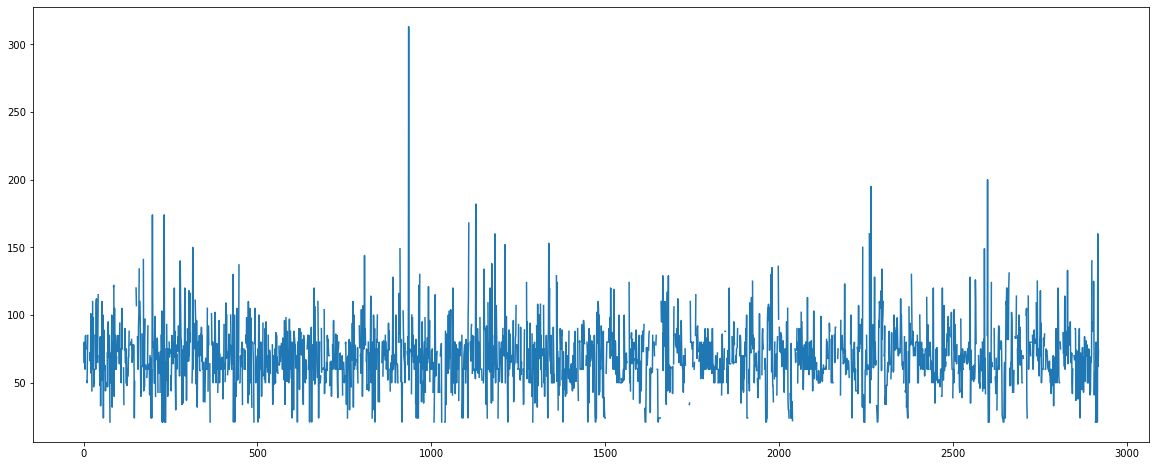

In [75]:
plt.figure(figsize=(20,8))
plt.plot(hdtotal['Id'],hdtotal['LotFrontage'])

In [11]:
hdtotal['LotFrontage'].fillna(hdtotal['LotFrontage'].mean, inplace=True)

In [12]:
hdtotal=hdtotal.drop(hdtotal.loc[hdtotal['Electrical'].isnull()].index)

Normalization and feature augmentation
============================================

In [14]:
def Quality2Int(x):
    if x=='None':
        r=0
    elif x=='Ex':
        r=1
    elif x=='Gd':
        r=2
    elif x=='TA':
        r=3
    elif x=='Fa':
        r=4
    elif x=='Po':
        r=5
    else:
        r=6
    return r
cols=['ExterQual','ExterCond','KitchenQual','HeatingQC','BsmtQual','BsmtCond','FireplaceQu','GarageQual','PoolQC']
for col in cols:
    hdtotal[col]=hdtotal[col].apply(Quality2Int)

In [15]:
hdtotal['TotalSF']=hdtotal['TotalBsmtSF']+hdtotal['1stFlrSF']+hdtotal['2ndFlrSF']


In [16]:
hdtotal['HasWoodDeck'] = (hdtotal['WoodDeckSF'] == 0) * 1
hdtotal['HasOpenPorch'] = (hdtotal['OpenPorchSF'] == 0) * 1
hdtotal['HasEnclosedPorch'] = (hdtotal['EnclosedPorch'] == 0) * 1
hdtotal['Has3SsnPorch'] = (hdtotal['3SsnPorch'] == 0) * 1
hdtotal['HScreenPorch'] = (hdtotal['ScreenPorch'] == 0) * 1
hdtotal['YrsSinceRemod'] = hdtotal['YrSold'].astype(int) - hdtotal['YearRemodAdd'].astype(int)
hdtotal['TotalHomeQual'] = hdtotal['OverallQual'] + hdtotal['OverallCond']
hdtotal['YrsSinceRemod'] = hdtotal['YrSold'].astype(int) - hdtotal['YearRemodAdd'].astype(int)
hdtotal['TotalHomeQual'] = hdtotal['OverallQual'] + hdtotal['OverallCond']

Data transformation ------ considerable

In [73]:
train_index=hdtrain.index
test_index=list(set(hdtotal.index).difference(set(hdtrain.index)))

Model Design Part
=================

In [51]:
hdt_train = hdtotal.iloc[train_index]
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
y = hdt_train.SalePrice
X = hdt_train.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [56]:
xgbmodel1=XGBRegressor(n_estimators=1200, learning_rate=0.01)
xgbmodel1.fit(train_X,train_y,eval_set=[(test_X, test_y)],verbose=600)

[14:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:196214
[600]	validation_0-rmse:26211.9
[1199]	validation_0-rmse:25391.3


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
prediction = xgbmodel1.predict(test_X)

In [58]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(prediction, test_y)))

Mean Absolute Error : 15878.908997252747


In [59]:
print(test_X)

[[3.0600e+02 2.0000e+01 1.0386e+04 ... 1.0000e+00 2.0000e+00 1.3000e+01]
 [1.0030e+03 2.0000e+01 1.1957e+04 ... 1.0000e+00 2.0000e+00 1.3000e+01]
 [6.0000e+00 5.0000e+01 1.4115e+04 ... 1.0000e+00 1.4000e+01 1.0000e+01]
 ...
 [5.8300e+02 9.0000e+01 1.1841e+04 ... 1.0000e+00 1.7000e+01 1.1000e+01]
 [1.9300e+02 2.0000e+01 9.0170e+03 ... 1.0000e+00 1.0000e+01 1.2000e+01]
 [1.2310e+03 9.0000e+01 1.8890e+04 ... 1.0000e+00 3.0000e+01 1.0000e+01]]


In [74]:
hdt_test = hdtotal.iloc[test_index]
hdt_test = hdt_test.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
prediction = xgbmodel1.predict(hdt_test.values)

In [75]:
print(prediction)

[128291.44 170575.48 177080.55 ... 179968.7  124491.59 207743.97]


In [78]:
save = pd.DataFrame({
    'Id' : hdtest.Id,
    'SalePrice' : prediction
})
save.to_csv('xgb_submission.csv', index=False)